### Derivative of a simple function with one input

In [2]:
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
def f(x):
    # Return the value of the function at x. The function defines a parabola.
    return 3*x**2 + 2*x + 1

In [4]:
# Create an array of xs values from -10 to 10
xs = np.arange(-10, 11, 1)
print("xs:", xs)
# Create an array of ys values by applying the function to each value of xs
ys = f(xs)
print("ys:", ys)

xs: [-10  -9  -8  -7  -6  -5  -4  -3  -2  -1   0   1   2   3   4   5   6   7
   8   9  10]
ys: [281 226 177 134  97  66  41  22   9   2   1   6  17  34  57  86 121 162
 209 262 321]


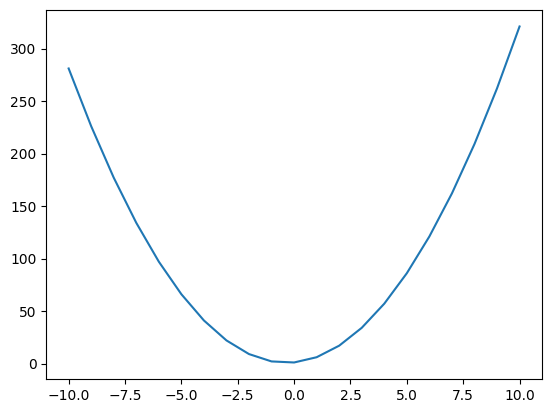

In [5]:
# Plot the values of xs and ys
plt.plot(xs, ys)

### Definition of a Derivative

The **derivative** of a function measures how the function's output changes with respect to a change in its input. It represents the **instantaneous rate of change** or the **slope of the tangent line** at a given point on the function's graph.

![Derivativatives Mathematically](./images/01-derivatives.png)

**Key Interpretations:**
1. **Geometric Interpretation**: The derivative gives the slope of the function at a particular point.
2. **Physical Interpretation**: In physics, the derivative of position with respect to time gives velocity, and the derivative of velocity gives acceleration.
3. **Computational Importance**: Derivatives are crucial in optimization, such as in gradient descent for training neural networks.


In [6]:
def df(x, h):
    # Return the value of the derivative of the function at x.
    return (f(x+h) - f(x))/h

In [7]:
# Test x = 7 and x = -7 
# The intitution is that the derivative at x = 7 is +ve and at x = -7 is -ve 
# which explains that the function is increasing at x = 7 and decreasing at x = -7 for samll increase in x with h=0.000001)
x = 7
h = 0.000001
# Perform the derivative of the function at x
derivative = df(x, h)
print(derivative)

44.00000301529872


### Derivative of a function with multiple inputs

In [8]:
a = 2.0
b = -1.0
c = 5.0
delta_c = 0.000001  

# Define the function 
def calculate_d(a, b, c):
  return a * b + c

# Calculate d1 and d2
d1 = calculate_d(a, b, c)
d2 = calculate_d(a, b, c + delta_c)

# Calculate and print the slope (derivative approximation)
slope = (d2 - d1) / delta_c

print('d1:', d1)
print('d2:', d2)
print('Approximate derivative:', slope)

# Calculate and print the actual derivative (for comparison)
actual_derivative = 1  # The derivative of a*b + c with respect to c is 1
print("Actual Derivative:", actual_derivative)
print("Error:", abs(slope-actual_derivative)) #Calculate the error

d1: 3.0
d2: 3.000001
Approximate derivative: 1.000000000139778
Actual Derivative: 1
Error: 1.397779669787269e-10


### Core value object of micrograd

In [9]:
class Value:
    def __init__(self, data, _children=(), _op=''):
        """
        Initializes a Value object.
        
        Args:
        data: The numerical value stored in the Value object.
        _childre: A tuple containing the child nodes of the Value object.
        _op: The operation performed on the child nodes.
        """
        self.data = data    # The numerical value stored in the Value object.
        self._prev = set(_children) # A set containing the child nodes of the Value object.
        self._op = _op  # The operation performed on the child nodes (+, *, - etc.).

    def __repr__(self):
        """
        Returns a string representation of the Value object.
        """
        return f"Value(data={self.data})"
    
    def __add__(self, other):
        """
        Defines the addition operation for the Value object.

        Args:
        other: The other Value object to be added.

        Returns:
        A new Value object containing the result of the addition operation.
        """
        out = Value(self.data + other.data, (self, other), '+') # Create a new Value object with the result of the addition operation.
        return out

    def __mul__(self, other):
        """
        Defines the multiplication operation for the Value object.
        
        Args:
        other: The other Value object to be multiplied.

        Returns:
        A new Value object containing the result of the multiplication operation.
        """
        out = Value(self.data * other.data, (self, other), '*') # Create a new Value object with the result of the multiplication operation.
        return out    
    
# Example usage
a = Value(data=2.0)
b = Value(data=-1.0)
c = Value(data=5.0)
d= a*b+c
d

Value(data=3.0)

In [12]:
print(f"Child nodes: {d._prev}, Operation: '{d._op}'")

Child nodes: {Value(data=5.0), Value(data=-2.0)}, Operation: '+'


In [ ]:
from graphviz import Digraph

def trace(root):
  # builds a set of all nodes and edges in a graph
  nodes, edges = set(), set()
  def build(v):
    if v not in nodes:
      nodes.add(v)
      for child in v._prev:
        edges.add((child, v))
        build(child)
  build(root)
  return nodes, edges

def draw_dot(root):
  dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'}) # LR = left to right
  
  nodes, edges = trace(root)
  for n in nodes:
    uid = str(id(n))
    # for any value in the graph, create a rectangular ('record') node for it
    dot.node(name = uid, label = "{ %s | data %.4f | grad %.4f }" % (n.label, n.data, n.grad), shape='record')
    if n._op:
      # if this value is a result of some operation, create an op node for it
      dot.node(name = uid + n._op, label = n._op)
      # and connect this node to it
      dot.edge(uid + n._op, uid)

  for n1, n2 in edges:
    # connect n1 to the op node of n2
    dot.edge(str(id(n1)), str(id(n2)) + n2._op)

  return dot